# Introduction to machine learning in Python

## TOC:
* [Python](#python)
* [Exploratory data analysis](#EDA)
* [Data preprocessing](#preprocess)
* [Logistic regression](#logreg)
* [Linear regression](#linreg)
* [Ridge regression](#ridge)
* [Deep learning](#DL)
* [Tensorflow 2.0 / keras](#TF)
* [PyTorch](#pytorch)
* [Jax](#jax)
* [Unsupervised learning](#unsuper)

## The Python ML ecosystem <a class="anchor" id="python"></a>

In this book, we will use Python 3.
For a good introduction, see e.g., the free books [Whirlwind tour of Python](https://github.com/jakevdp/WhirlwindTourOfPython)  by Jake Vanderplas or [Dive into Python 3](https://www.diveinto.org/python3/table-of-contents.html) by Mark Pilgrim.


This document is an example of a
 <a href="https://jupyter.org/">Jupyter notebook</a>,
which mixes code and results.
When developing software, it is often better to use an 
 IDE (interactive development environment),
 which keeps the code in separate files.
I recommend Spyder
<a href="https://www.spyder-ide.org">Spyder</a>,
although many people use
<a href="https://github.com/jupyterlab/jupyterlab">JupyterLab</a>
for a browser-based solution.

We will leverage many standard libraries from Python's "data science stack", listed in the table below.
For a good introduction to these, see e.g., the free book [Python Datascience Handbook](https://github.com/jakevdp/PythonDataScienceHandbook) by Jake Vanderplas,
or the class [Computational Statistics in Python](http://people.duke.edu/~ccc14/sta-663-2019/)  by Cliburn Chen at Duke University. For an excellent book on [scikit-learn](https://scikit-learn.org/stable/), see [Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow v2](https://github.com/ageron/handson-ml2) by Aurelion Geron.

<table align="left">
<tr>
<th>Name</th>
<th>Functionality</th>
<tr>
    <td> <a href="http://www.numpy.org">Numpy</a>
<td> Vector and matrix computations
<tr>
    <td> <a href="http://www.scipy.org">Scipy</a>
<td> Various scientific / math / stats / optimization functions    
<tr>
    <td> <a href="http://matplotlib.org">Matplotlib</a>
<td> Plotting
<tr>
    <td> <a href="https://seaborn.pydata.org/">Seaborn</a>
        <td> Extension of Matplotlib
<tr>
<td> <a href="http://pandas.pydata.org">Pandas</a>
<td> Manipulating tabular data and time series
<tr>
    <td> <a href="http://scikit-learn.org">Scikit-learn</a>
    <td> Implements many "Classical" ML methods </td>
</tr>
</table>



In [52]:
# Boiler plate code

%matplotlib inline
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
np.set_printoptions(precision=3)
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option('precision', 2) # 2 decimal places
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 30)
pd.set_option('display.width', 150) # wide windows

import os
figdir = "../figures" # set this to '' if you don't want to save figures
def save_fig(fname):
    if figdir:
        plt.savefig(os.path.join(figdir, fname))

## Exploratory data analysis <a class="anchor" id="EDA"></a>

Before trying to fit a model, it is a good idea to perform exploratory data analysis,
which usually means "looking at the data" in various ways, both visually and numerically.
We give some examples below.

### Auto-mpg dataset <a class="anchor" id="EDA-autompg"></a>

In [5]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Year', 'Origin', 'Name']
df = pd.read_csv(url, names=column_names, sep='\s+', na_values="?")

# The last column (name) is a unique id for the car, so we drop it
df = df.drop(columns=['Name'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
MPG             398 non-null float64
Cylinders       398 non-null int64
Displacement    398 non-null float64
Horsepower      392 non-null float64
Weight          398 non-null float64
Acceleration    398 non-null float64
Year            398 non-null int64
Origin          398 non-null int64
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


We notice that there are only 392 horsepower rows, but 398 of the others.
This is because the HP column has 6 **missing values** (also called NA, or
not available).
There are 3 main ways to deal with this:
- Drop the rows with any missing values using dropna()
- Drop any columns with any missing values using drop()
- Replace the missing vales with some other valye (eg the median) using fillna. (This is called missing value imputation.)
For simplicity, we adopt the first approach.


In [6]:
# Ensure same number of rows for all features.
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
MPG             392 non-null float64
Cylinders       392 non-null int64
Displacement    392 non-null float64
Horsepower      392 non-null float64
Weight          392 non-null float64
Acceleration    392 non-null float64
Year            392 non-null int64
Origin          392 non-null int64
dtypes: float64(5), int64(3)
memory usage: 27.6 KB


In [7]:
# Summary statistics
df.describe(include='all')

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
count,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00
mean,23.45,5.47,194.41,104.47,2977.58,15.54,75.98,1.58
std,7.81,1.71,104.64,38.49,849.40,2.76,3.68,0.81
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00,1.00
25%,17.00,4.00,105.00,75.00,2225.25,13.78,73.00,1.00
50%,22.75,4.00,151.00,93.50,2803.50,15.50,76.00,1.00
75%,29.00,8.00,275.75,126.00,3614.75,17.02,79.00,2.00
max,46.60,8.00,455.00,230.00,5140.00,24.80,82.00,3.00


In [9]:
# Convert Origin feature from int to categorical factor
df['Origin'] = df.Origin.replace([1,2,3],['USA','Europe','Japan'])
df['Origin'] = df['Origin'].astype('category')

# Let us check the categories (levels)
print(df['Origin'].cat.categories)

# Let us check the datatypes of all the features
print(df.dtypes)

Index(['Europe', 'Japan', 'USA'], dtype='object')
MPG              float64
Cylinders          int64
Displacement     float64
Horsepower       float64
Weight           float64
Acceleration     float64
Year               int64
Origin          category
dtype: object


In [10]:
# Let us inspect the data. We see meaningful names for Origin.
df.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,USA
394,44.0,4,97.0,52.0,2130.0,24.6,82,Europe
395,32.0,4,135.0,84.0,2295.0,11.6,82,USA
396,28.0,4,120.0,79.0,2625.0,18.6,82,USA
397,31.0,4,119.0,82.0,2720.0,19.4,82,USA


In [11]:
# Create latex table from first 5 rows 
tbl = df[-5:].to_latex(index=False, escape=False)
print(tbl)

\begin{tabular}{rrrrrrrl}
\toprule
  MPG &  Cylinders &  Displacement &  Horsepower &  Weight &  Acceleration &  Year &  Origin \\
\midrule
 27.0 &          4 &         140.0 &        86.0 &  2790.0 &          15.6 &    82 &     USA \\
 44.0 &          4 &          97.0 &        52.0 &  2130.0 &          24.6 &    82 &  Europe \\
 32.0 &          4 &         135.0 &        84.0 &  2295.0 &          11.6 &    82 &     USA \\
 28.0 &          4 &         120.0 &        79.0 &  2625.0 &          18.6 &    82 &     USA \\
 31.0 &          4 &         119.0 &        82.0 &  2720.0 &          19.4 &    82 &     USA \\
\bottomrule
\end{tabular}



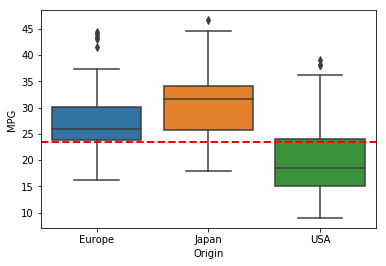

In [12]:
# Plot mpg distribution for cars from different countries of origin
data = pd.concat( [df['MPG'], df['Origin']], axis=1)
fig, ax = plt.subplots()
ax = sns.boxplot(x='Origin', y='MPG', data=data)
ax.axhline(data.MPG.mean(), color='r', linestyle='dashed', linewidth=2)
plt.savefig(os.path.join(figdir, 'auto-mpg-origin-boxplot.pdf'))
plt.show()

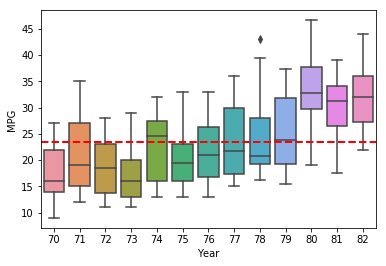

In [13]:
# Plot mpg distribution for cars from different years
data = pd.concat( [df['MPG'], df['Year']], axis=1)
fig, ax = plt.subplots()
ax = sns.boxplot(x='Year', y='MPG', data=data)
ax.axhline(data.MPG.mean(), color='r', linestyle='dashed', linewidth=2)
plt.savefig(os.path.join(figdir, 'auto-mpg-year-boxplot.pdf'))
plt.show()

### Iris dataset <a class="anchor" id="EDA-iris"></a>

In [15]:
# Get the iris dataset and look at it
from sklearn.datasets import load_iris
iris = load_iris()
# show attributes of this object
print(dir(iris))

# Extract numpy arrays
X = iris.data 
y = iris.target
print(np.shape(X)) # (150, 4)
print(np.c_[X[0:3,:], y[0:3]]) # concatenate columns

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']
(150, 4)
[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]]


In [16]:
# The data is sorted by class. Let's shuffle the rows.
N = np.shape(X)[0]
rng = np.random.RandomState(42)
perm = rng.permutation(N)
X = X[perm]
y = y[perm]
print(np.c_[X[0:3,:], y[0:3]])

[[6.1 2.8 4.7 1.2 1. ]
 [5.7 3.8 1.7 0.3 0. ]
 [7.7 2.6 6.9 2.3 2. ]]


In [17]:
# Convert to pandas dataframe 
df = pd.DataFrame(data=X, columns=['sl', 'sw', 'pl', 'pw'])
# create column for labels
df['label'] = pd.Series(iris.target_names[y], dtype='category')

# Summary statistics
df.describe(include='all')


,sl,sw,pl,pw,label
count,150.00,150.00,150.00,150.00,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.84,3.06,3.76,1.20,NaN
std,0.83,0.44,1.77,0.76,NaN
min,4.30,2.00,1.00,0.10,NaN
25%,5.10,2.80,1.60,0.30,NaN
50%,5.80,3.00,4.35,1.30,NaN
75%,6.40,3.30,5.10,1.80,NaN


In [18]:
# Peak at the data
df.head()

,sl,sw,pl,pw,label
0,6.1,2.8,4.7,1.2,versicolor
1,5.7,3.8,1.7,0.3,setosa
2,7.7,2.6,6.9,2.3,virginica
3,6.0,2.9,4.5,1.5,versicolor
4,6.8,2.8,4.8,1.4,versicolor


In [19]:
# Create latex table from first 5 rows 
tbl = df[:6].to_latex(index=False, escape=False)
print(tbl)

\begin{tabular}{rrrrl}
\toprule
  sl &   sw &   pl &   pw &       label \\
\midrule
 6.1 &  2.8 &  4.7 &  1.2 &  versicolor \\
 5.7 &  3.8 &  1.7 &  0.3 &      setosa \\
 7.7 &  2.6 &  6.9 &  2.3 &   virginica \\
 6.0 &  2.9 &  4.5 &  1.5 &  versicolor \\
 6.8 &  2.8 &  4.8 &  1.4 &  versicolor \\
 5.4 &  3.4 &  1.5 &  0.4 &      setosa \\
\bottomrule
\end{tabular}



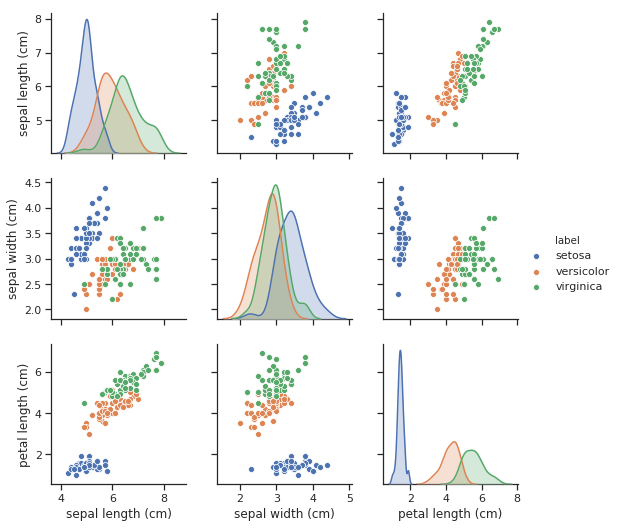

In [20]:
# 2d scatterplot
#https://seaborn.pydata.org/generated/seaborn.pairplot.html
import seaborn as sns;
sns.set(style="ticks", color_codes=True)
# Make a dataframe with nicer labels for printing
#iris_df = sns.load_dataset("iris")
iris_df = df.copy()
iris_df.columns = iris['feature_names'] + ['label'] 
g = sns.pairplot(iris_df, vars = iris_df.columns[0:3] , hue="label")
save_fig("iris-scatterplot.pdf")
plt.show()

### Boston housing dataset <a class="anchor" id="EDA-boston"></a>

In [24]:
# Load data (creates numpy arrays)
boston = sklearn.datasets.load_boston()
X = boston.data
y = boston.target

# Convert to Pandas format
df = pd.DataFrame(X)
df.columns = boston.feature_names
df['MEDV'] = y.tolist()

df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,5.06e+02,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61e+00,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60e+00,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,6.32e-03,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,8.20e-02,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,2.57e-01,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68e+00,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,8.90e+01,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


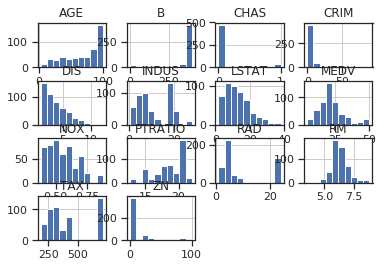

In [25]:
# plot marginal histograms of each column (13 features, 1 response)
df.hist()
plt.show()

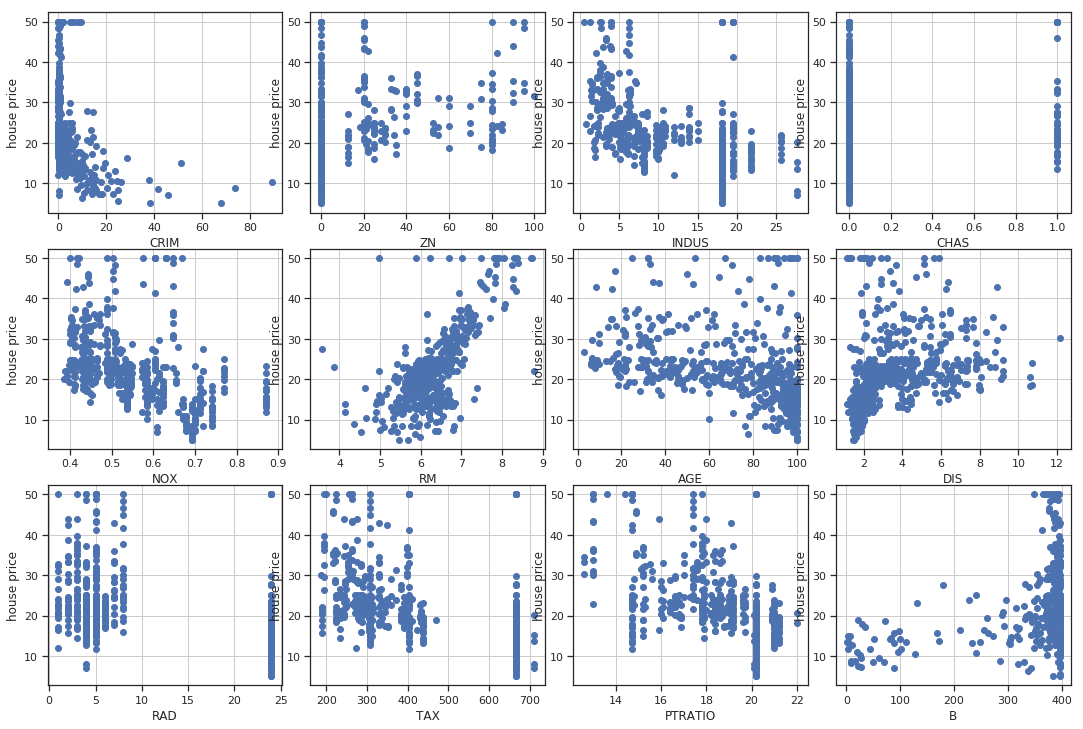

In [26]:
# scatter plot of response vs each feature 
nrows = 3; ncols = 4;
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharey=True, figsize=[15, 10])
plt.tight_layout()
plt.clf()
for i in range(0,12):
    plt.subplot(nrows, ncols, i+1)
    plt.scatter(X[:,i], y)
    plt.xlabel(boston.feature_names[i])
    plt.ylabel("house price")
    plt.grid()
save_fig("boston-housing-scatter.pdf")
plt.show()

## Data preprocessing <a class="anchor" id="preprocess"></a>

We often have to preprocess data before feeding it to an ML model. 
We give some examples below.

### Standardizing numeric features in Boston housing <a class="anchor" id="preprocess-boston"></a>

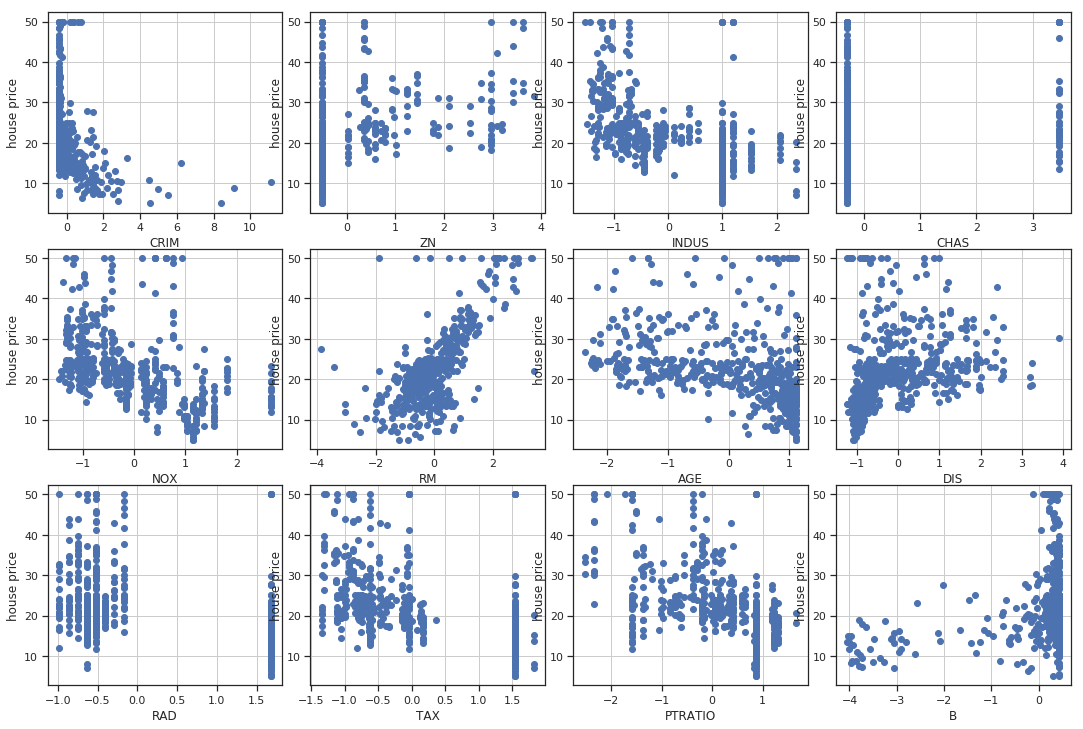

In [37]:
import sklearn.datasets
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split


boston = sklearn.datasets.load_boston()
X = boston.data
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

scaler = sklearn.preprocessing.StandardScaler()
scaler = scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(X) # entire dataset

# scatter plot of response vs each feature.
# The shape of the data looks the same as the unscaled case, but the x-axis of each feature is changed.
nrows = 3; ncols = 4;
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharey=True, figsize=[15, 10])
plt.tight_layout()
plt.clf()
for i in range(0,12):
    plt.subplot(nrows, ncols, i+1)
    plt.scatter(X_scaled[:,i], y)
    plt.xlabel(boston.feature_names[i])
    plt.ylabel("house price")
    plt.grid()
save_fig("boston-housing-scatter-scaled.pdf")
plt.show()

### One-hot encoding for Autompg <a class="anchor" id="preprocess-onehot"></a>

In [62]:
# Get data 
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Year', 'Origin', 'Name']
df = pd.read_csv(url, names=column_names, sep='\s+', na_values="?")

# The last column (name) is a unique id for the car, so we drop it
df = df.drop(columns=['Name'])

# Ensure same number of rows for all features.
df = df.dropna()

# Convert origin integer to categorical factor
df['Origin'] = df.Origin.replace([1,2,3],['USA','Europe','Japan'])
df['Origin'] = df['Origin'].astype('category')


df.info()

df.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
MPG             392 non-null float64
Cylinders       392 non-null int64
Displacement    392 non-null float64
Horsepower      392 non-null float64
Weight          392 non-null float64
Acceleration    392 non-null float64
Year            392 non-null int64
Origin          392 non-null category
dtypes: category(1), float64(5), int64(2)
memory usage: 25.0 KB


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,USA
394,44.0,4,97.0,52.0,2130.0,24.6,82,Europe
395,32.0,4,135.0,84.0,2295.0,11.6,82,USA
396,28.0,4,120.0,79.0,2625.0,18.6,82,USA
397,31.0,4,119.0,82.0,2720.0,19.4,82,USA


In [63]:
# Convert origin factor to integer
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
origin_cat = df['Origin']

print('before transform')
print(origin_cat)

origin_int = encoder.fit_transform(origin_cat)
print('after transform')
print(origin_int)

# Make sure we can decode back to strings
print('class names are {}'.format(encoder.classes_))
origin_cat2 = encoder.inverse_transform(origin_int)
print(origin_cat2)

before transform
0         USA
1         USA
2         USA
3         USA
4         USA
        ...  
393       USA
394    Europe
395       USA
396       USA
397       USA
Name: Origin, Length: 392, dtype: category
Categories (3, object): [Europe, Japan, USA]
after transform
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 0 0 0 0 0 2 2 2 2 2 1 2 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 1 1 0 2 1 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2
 2 0 0 0 0 2 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 1 2 1 1
 2 2 0 2 2 0 0 0 0 2 0 1 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 0 0 0 1 1 2 0 0 1
 1 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 0 1 2 0 2 0 0 0 0 1 0 0 2 2 0
 2 2 2 2 2 2 2 2 2 2 0 1 2 2 2 2 0 1 1 2 0 2 0 1 0 2 2 2 2 1 2 0 2 1 2 2 2
 2 2 2 2 2 2 2 2 2 0 2 1 2 2 2 1 0 1 0 1 0 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 1 2 1 2 2 1 0 0 0 0 0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 2 2 0
 2 0 2 2 2 1 0 2 2 2 2 0 1 2 1 2 2 2 2 0 1 1 1 1 1 2 1 0 0 0 0 1 1 0 1 1 0
 1 2 2 2 2 2 1 2 1 1 1 1 1 2 2 2 0 1 1 1 1 0 0 1 1

In [48]:
# Convert integer encoding to one-hot vectors
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
origin_onehot_sparse = encoder.fit_transform(origin_int.reshape(-1,1)) # Sparse array
origin_onehot_dense = origin_onehot_sparse.toarray()
print(origin_onehot_dense[-5:,:])

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [ ]:

# We should be able to combine LabelEncoder and OneHotEncoder together
# using a Pipeline. However this fails due to known bug: https://github.com/scikit-learn/scikit-learn/issues/3956
# TypeError: fit_transform() takes 2 positional arguments but 3 were given

'''
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('str2int', LabelEncoder()),
    ('int2onehot', OneHotEncoder())
])
origin_onehot2 = pipeline.fit_transform(df['Origin'])
'''

# However, as of sckit v0.20, we can now convert Categorical to OneHot directly.
# https://jorisvandenbossche.github.io/blog/2017/11/20/categorical-encoder/
# https://medium.com/bigdatarepublic/integrating-pandas-and-scikit-learn-with-pipelines-f70eb6183696



In [49]:
# Function to add one-hot encoding as extra columns to a dataframe

# See also sklearn-pandas library
#https://github.com/scikit-learn-contrib/sklearn-pandas#transformation-mapping

def one_hot_encode_dataframe_col(df, colname):
  encoder = OneHotEncoder(sparse=False)
  data = df[[colname]] # Extract column as (N,1) matrix
  data_onehot = encoder.fit_transform(data)
  df = df.drop(columns=[colname])
  ncats = np.size(encoder.categories_)
  for c in range(ncats):
    colname_c = '{}:{}'.format(colname, c)
    df[colname_c] = data_onehot[:,c]
  return df, encoder

df_onehot, encoder_origin = one_hot_encode_dataframe_col(df, 'Origin')

df_onehot.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin:0,Origin:1,Origin:2
393,27.0,4,140.0,86.0,2790.0,15.6,82,0.0,0.0,1.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,1.0,0.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0.0,0.0,1.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,0.0,0.0,1.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,0.0,0.0,1.0


### Feature crosses for Autompg <a class="anchor" id="preprocess-feature-cross"></a>

In [50]:
# Simple example of feature cross
import patsy

cylinders = pd.Series([4,   2,    3,   2,   4], dtype='int')
colors = pd.Series(['R', 'R', 'G', 'B', 'R'], dtype='category')
origin = pd.Series(['U', 'J', 'J', 'U', 'U'], dtype='category')
data = {'Cyl': cylinders, 'C': colors, 'O': origin}
df0 = pd.DataFrame(data=data)
print(df0)

df_cross0 = patsy.dmatrix('Cyl + C + O + C:O', df0, return_type='dataframe')
print(df_cross0.tail())

   Cyl  C  O
0    4  R  U
1    2  R  J
2    3  G  J
3    2  B  U
4    4  R  U
   Intercept  C[T.G]  C[T.R]  O[T.U]  C[T.G]:O[T.U]  C[T.R]:O[T.U]  Cyl
0        1.0     0.0     1.0     1.0            0.0            1.0  4.0
1        1.0     0.0     1.0     0.0            0.0            0.0  2.0
2        1.0     1.0     0.0     0.0            0.0            0.0  3.0
3        1.0     0.0     0.0     1.0            0.0            0.0  2.0
4        1.0     0.0     1.0     1.0            0.0            1.0  4.0


In [51]:
# Create feature crosses for AutoMPG

# For demo purposes, replace integer year with binary decade (70s and 80s)
year = df.pop('Year')
decade = [ 70 if (y>=70 and y<=79) else 80 for y in year ]
df['Decade'] =  pd.Series(decade, dtype='category')

# Make feature cross between #decades and origin (2*3 values)
y = df.pop("MPG") # Remove target column from dataframe and store
df.columns = ['Cyl', 'Dsp', 'HP', 'Wgt', 'Acc',  'O', 'D'] # Shorten names
df['O'] = df['O'].replace(['USA','Europe','Japan'], ['U','E','J'])
df_cross = patsy.dmatrix('D:O + Cyl + Dsp + HP + Wgt + Acc', df, return_type='dataframe')
print(df_cross.tail())

     Intercept  O[T.J]  O[T.U]  D[T.80]:O[E]  D[T.80]:O[J]  D[T.80]:O[U]  Cyl    Dsp     HP     Wgt   Acc
387        1.0     0.0     1.0           0.0           0.0           1.0  6.0  262.0   85.0  3015.0  17.0
388        1.0     0.0     1.0           0.0           0.0           1.0  4.0  156.0   92.0  2585.0  14.5
389        1.0     0.0     1.0           0.0           0.0           1.0  6.0  232.0  112.0  2835.0  14.7
390        1.0     1.0     0.0           0.0           1.0           0.0  4.0  144.0   96.0  2665.0  13.9
391        1.0     0.0     1.0           0.0           0.0           1.0  4.0  135.0   84.0  2370.0  13.0


## Logistic regression <a class="anchor" id="logreg"></a>

In this section, we illustrate how to perform logistic regression using scikit-learn.
We apply it to the iris dataset, both 2-class and 3-class version.
Our code is based on Aurelien Geron's code
from 
https://github.com/ageron/handson-ml2/blob/master/04_training_linear_models.ipynb


### Logistic regression on iris dataset: 2 classes, 1 feature <a class="anchor" id="logreg-iris-2class-1d"></a>

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

iris = datasets.load_iris()


# Initially use 1 feature, 2 classes
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0'

#log_reg = LogisticRegression(solver="lbfgs", penalty='none')
# Penalty='none' introduced in sklearn 0.21.
# For older versions, use this method:
log_reg = LogisticRegression(solver="lbfgs", C=1000)
log_reg.fit(X, y)


LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

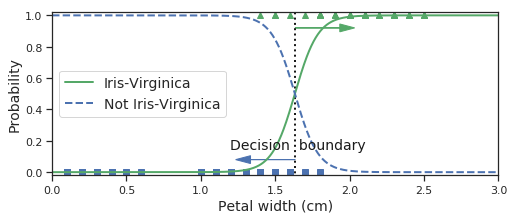

In [29]:
# Plot decision boundary for range of 1d inputs

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
save_fig("iris-logreg-1d.pdf")
plt.show()

### Logistic regression on iris dataset: 2 classes, 2 features <a class="anchor" id="logreg-iris-2class-2d"></a>

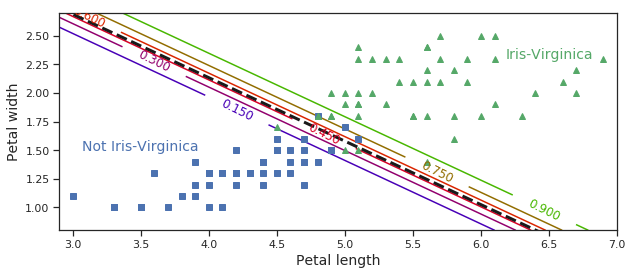

In [30]:
# Now use 2 features, 2 classes

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

# penalty='none' is introduced in sklearn 0.21
#log_reg = LogisticRegression(solver="lbfgs", penalty='none')
# For older versions, we can simulate no regularization by using a large C
log_reg = LogisticRegression(solver="lbfgs", C=1000)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
save_fig("iris-logreg-2d-2class.pdf")
plt.show()

### Logistic regression on iris dataset: 3 classes, 2 features <a class="anchor" id="logreg-iris-3class-2d"></a>

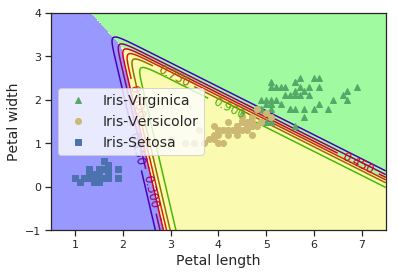

In [31]:
# Now use 2 features and all 3 classes
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

#softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", penalty="none")
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=1000, random_state=42)
softmax_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(0.5, 7.5, 500).reshape(-1, 1),
        np.linspace(-1, 4, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure()
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff','#fafab0','#a0faa0'])
#custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0']
#custom_cmap = ListedColormap(sns.color_palette())
                              
plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
#plt.axis([0, 7, 0, 3.5])
save_fig("iris-logreg-2d-3class.pdf")
plt.show()



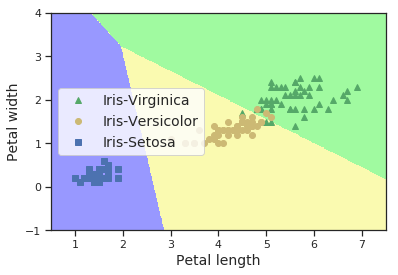

In [32]:
plt.figure()
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
#plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
#plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Iris-Setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
#contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
#plt.axis([0, 7, 0, 3.5])
save_fig("iris-logreg-2d-3class-noprobs.pdf")
plt.show()


In [33]:
# Get predictive distribution for a single example
X = [[2.5, 3.0]] # (1,2) array
y_probs = softmax_reg.predict_proba(X)
print(np.round(y_probs, 2)) # [[0.53 0.37 0.1 ]]

[[0.01 0.4  0.6 ]]


In [34]:
# Fit model and evaluate on separate test set

from sklearn.model_selection import train_test_split
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features to make problem harder
#X = iris.data # use all data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

#logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial', penalty='none')
logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial', C=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
errs = (y_pred != y_test)
nerrs = np.sum(errs)
print("Made {} errors out of {}, on instances {}".format(nerrs, len(y_pred), np.where(errs)))
# With ndims=2: Made 10 errors out of 50, on instances
#  (array([ 4, 15, 21, 32, 35, 36, 40, 41, 42, 48]),)


from sklearn.metrics import zero_one_loss
err_rate_test = zero_one_loss(y_test, y_pred)
assert np.isclose(err_rate_test, nerrs / len(y_pred))
err_rate_train =  zero_one_loss(y_train, logreg.predict(X_train))
print("Error rates on train {:0.3f} and test {:0.3f}".format(
    err_rate_train, err_rate_test))
#Error rates on train 0.180 and test 0.200


Made 10 errors out of 50, on instances (array([ 4, 15, 21, 32, 35, 36, 40, 41, 42, 48]),)
Error rates on train 0.180 and test 0.200


## Linear regression <a class="anchor" id="linreg"></a>

In this section, we illustrate how to perform linear regression using scikit-learn.

### Linear regression in 1d <a class="anchor" id="linreg-1d"></a>

In [70]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler 
import sklearn.metrics 
from sklearn.metrics import mean_squared_error as mse

def make_1dregression_data(n=21):
    np.random.seed(0)
    xtrain = np.linspace(0.0, 20, n)
    xtest = np.arange(0.0, 20, 0.1)
    sigma2 = 4
    w = np.array([-1.5, 1/9.])
    fun = lambda x: w[0]*x + w[1]*np.square(x)
    ytrain = fun(xtrain) + np.random.normal(0, 1, xtrain.shape) * \
        np.sqrt(sigma2)
    ytest= fun(xtest) + np.random.normal(0, 1, xtest.shape) * \
        np.sqrt(sigma2)
    return xtrain, ytrain, xtest, ytest

xtrain, ytrain, xtest, ytest = make_1dregression_data(n=21)

#Rescaling data
scaler = MinMaxScaler(feature_range=(-1, 1))
Xtrain = scaler.fit_transform(xtrain.reshape(-1, 1))
Xtest = scaler.transform(xtest.reshape(-1, 1))

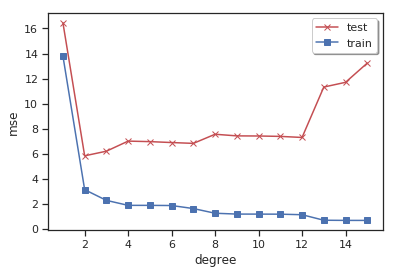

In [71]:
degs = np.arange(1, 21, 1)
ndegs = np.max(degs)
mse_train = np.empty(ndegs)
mse_test = np.empty(ndegs)
ytest_pred_stored = np.empty(ndegs, dtype=np.ndarray)
ytrain_pred_stored = np.empty(ndegs, dtype=np.ndarray)
for deg in degs:
    model = LinearRegression()
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    Xtrain_poly = poly_features.fit_transform(Xtrain)
    model.fit(Xtrain_poly, ytrain)
    ytrain_pred = model.predict(Xtrain_poly)
    ytrain_pred_stored[deg-1] = ytrain_pred
    Xtest_poly = poly_features.transform(Xtest)
    ytest_pred = model.predict(Xtest_poly)
    mse_train[deg-1] = mse(ytrain_pred, ytrain) 
    mse_test[deg-1] = mse(ytest_pred, ytest)
    ytest_pred_stored[deg-1] = ytest_pred
    
# Plot MSE vs degree
fig, ax = plt.subplots()
mask = degs <= 15
ax.plot(degs[mask], mse_test[mask], color = 'r', marker = 'x',label='test')
ax.plot(degs[mask], mse_train[mask], color='b', marker = 's', label='train')
ax.legend(loc='upper right', shadow=True)
plt.xlabel('degree')
plt.ylabel('mse')
save_fig('polyfitVsDegree.pdf')
plt.show()


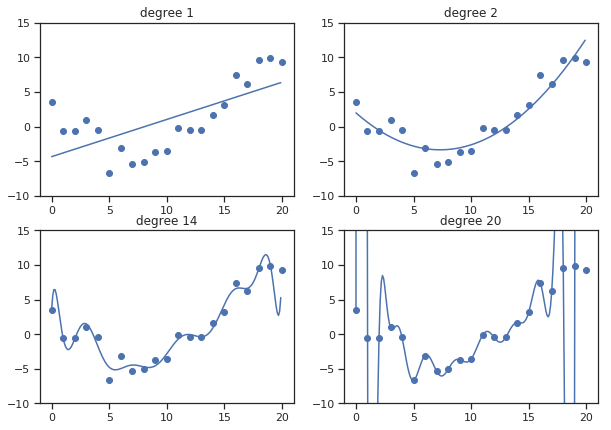

In [96]:
# Plot fitted functions
chosen_degs = [1, 2, 14, 20]
fig, axes = plt.subplots(2,2, figsize=(10,7))
axes = axes.reshape(-1)
for i, deg in enumerate(chosen_degs):
    #fig, ax = plt.subplots()
    ax = axes[i]
    ax.scatter(xtrain, ytrain)
    ax.plot(xtest, ytest_pred_stored[deg-1])
    ax.set_ylim((-10, 15))
    ax.set_title('degree {}'.format(deg))
    #save_fig('polyfitDegree{}.pdf'.format(deg))
plt.show()

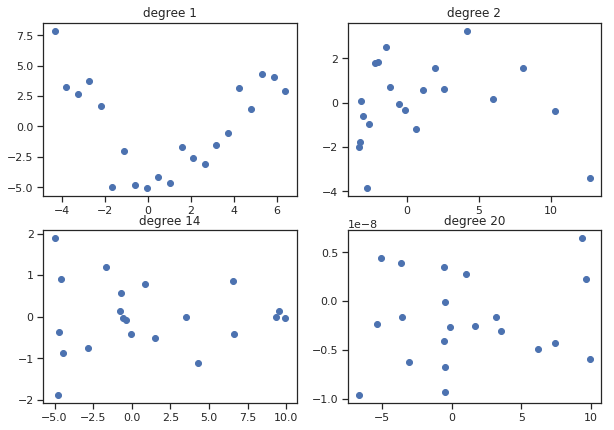

In [95]:
# Plot residuals
chosen_degs = [1, 2, 14, 20]
fig, axes = plt.subplots(2, 2, figsize=(10,7))
axes = axes.reshape(-1)
for i, deg in enumerate(chosen_degs):
    #fig, ax = plt.subplots(figsize=(3,2))
    ax = axes[i]
    ypred =  ytrain_pred_stored[deg-1]
    residuals = ytrain - ypred
    ax.plot(ypred, residuals, 'o')
    ax.set_title('degree {}'.format(deg))
    #save_fig('polyfitDegree{}Residuals.pdf'.format(deg))
plt.show()

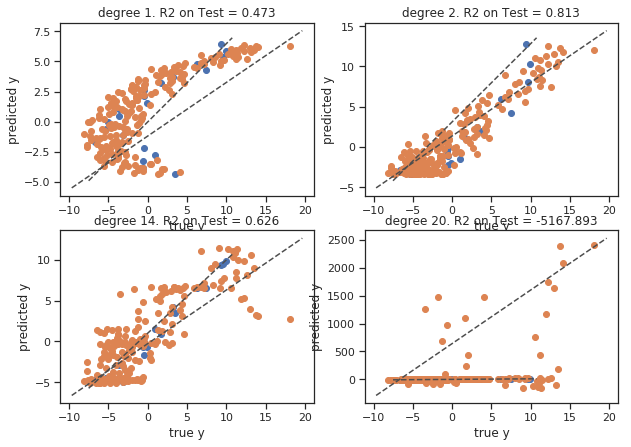

In [94]:
# Plot fit vs actual
chosen_degs = [1, 2, 14, 20]
fig, axes = plt.subplots(2,2, figsize=(10,7))
axes = axes.reshape(-1)
for i, deg in enumerate(chosen_degs):
    for train in [True, False]:
        if train:
            ytrue = ytrain
            ypred = ytrain_pred_stored[deg-1]
            dataset = 'Train'
        else:
            ytrue = ytest
            ypred = ytest_pred_stored[deg-1]
            dataset = 'Test'
        #fig, ax = plt.subplots()
        ax = axes[i]
        ax.scatter(ytrue, ypred)
        ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
        ax.set_xlabel('true y')
        ax.set_ylabel('predicted y')
        r2 = sklearn.metrics.r2_score(ytrue, ypred)
        ax.set_title('degree {}. R2 on {} = {:0.3f}'.format(deg, dataset, r2))
        #save_fig('polyfitDegree{}FitVsActual{}.pdf'.format(deg, dataset))
plt.show()

### Linear regression for boston housing <a class="anchor" id="linreg-boston"></a>

In [66]:
import sklearn.datasets
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split

boston = sklearn.datasets.load_boston()
X = boston.data
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

scaler = sklearn.preprocessing.StandardScaler()
scaler = scaler.fit(X_train)
Xscaled = scaler.transform(X_train)
# equivalent to Xscaled = scaler.fit_transform(X_train)

# Fit model
linreg = lm.LinearRegression()
linreg.fit(Xscaled, y_train)

# Extract parameters
coef = np.append(linreg.coef_, linreg.intercept_)
names = np.append(boston.feature_names, 'intercept')
print(names)
print(coef)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT' 'intercept']
[-0.989  0.868  0.405  0.862 -1.9    2.808 -0.359 -3.046  2.033 -1.364
 -2.083  1.041 -3.926 22.971]


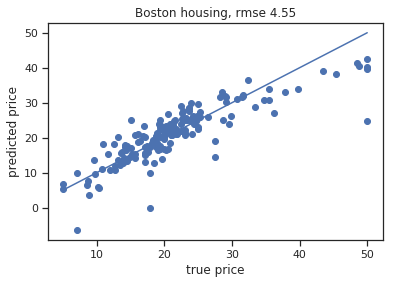

In [67]:
# Assess fit on test set
Xtest_scaled = scaler.transform(X_test)
ypred = linreg.predict(Xtest_scaled) 

plt.figure()
plt.scatter(y_test, ypred)
plt.xlabel("true price")
plt.ylabel("predicted price")
mse = sklearn.metrics.mean_squared_error(y_test, ypred)
plt.title("Boston housing, rmse {:.2f}".format(np.sqrt(mse)))
xs = np.linspace(min(y), max(y), 100)
plt.plot(xs, xs, '-')
save_fig("boston-housing-predict.pdf")
plt.show()

## Ridge regression <a class="anchor" id="ridge"></a>

In this section, we illustrate how to perform ridge regression using scikit-learn.

In [97]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import mean_squared_error as mse

xtrain, ytrain, xtest, ytest = make_1dregression_data(n=21)

#Rescaling data
scaler = MinMaxScaler(feature_range=(-1, 1))
Xtrain = scaler.fit_transform(xtrain.reshape(-1, 1))
Xtest = scaler.transform(xtest.reshape(-1, 1))



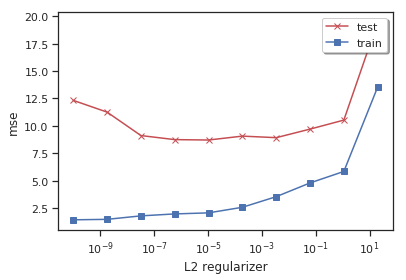

In [98]:

deg = 14
alphas = np.logspace(-10, 1.3, 10)
nalphas = len(alphas)
mse_train = np.empty(nalphas)
mse_test = np.empty(nalphas)
ytest_pred_stored = dict()
for i, alpha in enumerate(alphas):
    model = Ridge(alpha=alpha, fit_intercept=False)
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    Xtrain_poly = poly_features.fit_transform(Xtrain)
    model.fit(Xtrain_poly, ytrain)
    ytrain_pred = model.predict(Xtrain_poly)
    Xtest_poly = poly_features.transform(Xtest)
    ytest_pred = model.predict(Xtest_poly)
    mse_train[i] = mse(ytrain_pred, ytrain) 
    mse_test[i] = mse(ytest_pred, ytest)
    ytest_pred_stored[alpha] = ytest_pred
    
# Plot MSE vs degree
fig, ax = plt.subplots()
mask = [True]*nalphas
ax.plot(alphas[mask], mse_test[mask], color = 'r', marker = 'x',label='test')
ax.plot(alphas[mask], mse_train[mask], color='b', marker = 's', label='train')
ax.set_xscale('log')
ax.legend(loc='upper right', shadow=True)
plt.xlabel('L2 regularizer')
plt.ylabel('mse')
save_fig('polyfitVsRidge.pdf')
plt.show()

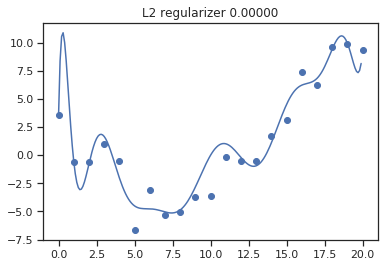

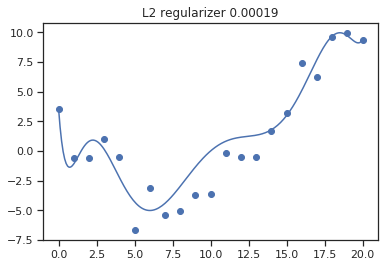

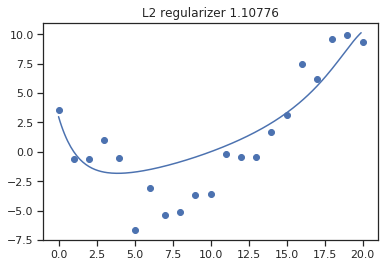

In [99]:
# Plot fitted functions
chosen_alphas = alphas[[0,5,8]]
for i, alpha in enumerate(chosen_alphas):
    fig, ax = plt.subplots()
    ax.scatter(xtrain, ytrain)
    ax.plot(xtest, ytest_pred_stored[alpha])
    plt.title('L2 regularizer {:0.5f}'.format(alpha))
    save_fig('polyfitRidge{}.pdf'.format(i))
    plt.show()

## Deep learning in Python <a class="anchor" id="DL"></a>


To implement more advanced models, such as deep learning (DL) methods,
it is very useful to have an automatic differentiation library - this lets us define
an objective function using numpy, and automatically compute its gradient (which we can pass to an optimizer),
without having to do painful manual calculations.
It is also useful to have a library that can compile computation graphs and exploit hardware accelerators, such as GPUs. (Some libraries also support distributed computation, but we will not need use this feature in this book.) We will use the libraries listed below.

For a good book on TF 2.0, see  see [Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow v2](https://github.com/ageron/handson-ml2) by Aurelion Geron.
For a good list of PyTorch tutorials,
see https://github.com/ritchieng/the-incredible-pytorch
or [this course from Udacity](https://github.com/udacity/deep-learning-v2-pytorch).

<table align="left">
    <tr>
        <th>Name</th>
        <th>Functionality</th>
    </tr>
    <tr> 
        <td align="left"> <a href="http://www.tensorflow.org">Tensorflow 2.0</a></td>
            <td align="left"> Accelerated NumPy-like library, autodiff, high level  API (keras)</td>
    <tr>
        <td align="left"> <a href="http://pytorch.org">Pytorch 1.0</a></td>
         <td align="left"> Accelerated NumPy-like library, autodiff,  "pythonic" API</td>
           <tr>
        <td align="left"> <a href="http://github.com/google/jax">Jax</a></td>
        <td align="left"> Accelerated version of NumPy, flexible autodiff,  flexible JIT compiler,
            minimal DL library, functional (stateless) API</td>
</table>
     




## Tensorflow 2.0 / keras <a class="anchor" id="TF"></a>

In this section, we give a few examples of how to fit MLPs using the keras interface to TF 2.0.


In [1]:
import tensorflow as tf
from tensorflow import keras
from time import time
print(tf.__version__)

print(tf.test.is_gpu_available())
print(tf.test.gpu_device_name())

2.0.0-dev20190629
True
/device:GPU:0


### Fit MLP to Fashion-MNIST <a class="anchor" id="fashion-keras-mlp"></a>

In [101]:
# Fashion MNIST has the same size and shape as MNIST, but the images
# are of items of clothing, rather than handwritten digits.
# Fashion-MNIST is slightly harder to than regular MNIST.

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

print(np.shape(train_images))
print(np.shape(test_images))

(60000, 28, 28)
(10000, 28, 28)


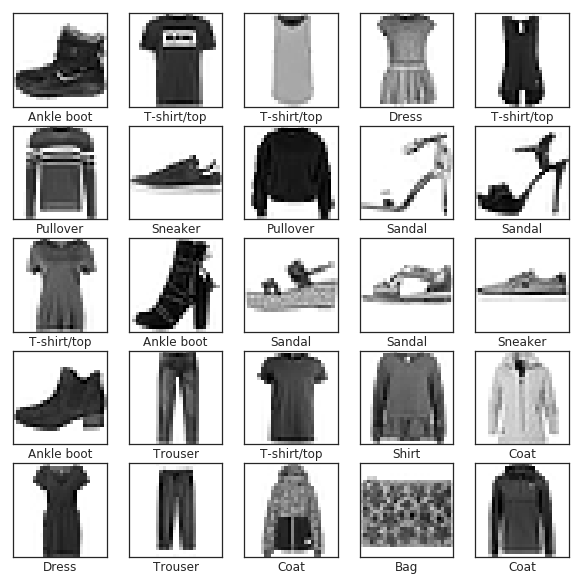

In [102]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
save_fig("fashion-mnist-data.pdf")
plt.show()

In [104]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# We use sparse categorical cross entropy since the labels are integers, not dense one-hot vectors.
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# We just train for 2 epochs because it is faster, and
# and because it produces more errors, which makes for a more interesting plot :)
time_start = time()
model.fit(train_images, train_labels, epochs=2)
print('time spent training {:0.3f}'.format(time() - time_start))


W0702 11:44:22.674006 140155646461760 deprecation.py:323] From /home/murphyk/miniconda3/lib/python3.7/site-packages/tensorflow_core/python/ops/math_grad.py:1251: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0702 11:44:22.707194 140155646461760 deprecation.py:323] From /home/murphyk/miniconda3/lib/python3.7/site-packages/tensorflow_core/python/keras/optimizer_v2/optimizer_v2.py:460: BaseResourceVariable.constraint (from tensorflow.python.ops.resource_variable_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Apply a constraint manually following the optimizer update step.


Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 25us/sample - loss: 0.4987 - accuracy: 0.8252
Epoch 2/2
60000/60000 [==============================] - 1s 24us/sample - loss: 0.3751 - accuracy: 0.8655
time spent training 3.262


In [108]:
# Overall accuracy
train_loss, train_acc = model.evaluate(train_images, train_labels)
print('Train accuracy:', train_acc)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

60000/60000 [==============================] - 1s 12us/sample - loss: 0.3339 - accuracy: 0.8787
Train accuracy: 0.87873334
10000/10000 [==============================] - 0s 13us/sample - loss: 0.3925 - accuracy: 0.8621
Test accuracy: 0.8621


In [106]:
predictions = model.predict(test_images)
print(np.shape(predictions))

# To apply prediction to a single image, we need to reshape to an (N,D,D) tensor where N=1
img = test_images[0]
img = (np.expand_dims(img,0))
print(img.shape)
predictions_single = model.predict(img)
print(predictions_single.shape)



(10000, 10)
(1, 28, 28)
(1, 10)


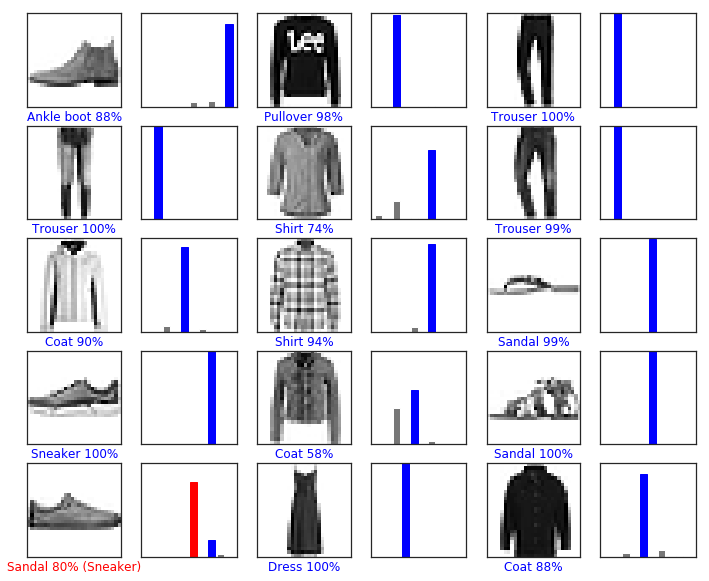

In [107]:
def plot_image_and_label(predictions_array, true_label, img):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
    plt.xlabel("{} {:2.0f}%".format(class_names[predicted_label],
                                100*np.max(predictions_array)),
                                color=color)
  else:
    color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_label_dist(predictions_array, true_label):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  
  
# Plot the first 15 test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image_and_label(predictions[i], test_labels[i], test_images[i])
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_label_dist(predictions[i], test_labels[i])
save_fig("fashion-mnist-predictions.pdf")
plt.show()

### MLP on IMDB-reviews <a class="anchor" id="imdb-keras-mlp"></a>

In [117]:
# We can use the version of the dataset from tfds 

import tensorflow_datasets as tfds
imdb, info = tfds.load('imdb_reviews/subwords32k', with_info=True, as_supervised=True)
tokenizer = info.features['text'].encoder

print(info)
train_dataset, test_data = imdb['train'], imdb['test']

tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=0.1.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    urls=['http://ai.stanford.edu/~amaas/data/sentiment/'],
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=32650>)
    },
    total_num_examples=100000,
    splits={
        'test': <tfds.core.SplitInfo num_examples=25000>,
        'train': <tfds.core.SplitInfo num_examples=25000>,
        'unsupervised': <tfds.core.SplitInfo num_examples=50000>
    },
    supervised_keys=('text', 'label'),
    citation='"""
        @InProceedings{maas-EtAl:2011:ACL-HLT2011,
          auth

In [115]:
prefix = train_dataset.batch(1).take(3) 
for data, label in prefix:
    print(data)
    print(tokenizer.decode(data.numpy()[0]))

tf.Tensor(
[[   12   259    14    32    26  7004  9469    28    67  8205   113   100
  22709   993    55    24  3463    90    15    18   239     3  2644    83
    362    92     6     1   720   167  1972    49  5587  1180    28     6
     67    84     8  2206    55    24    92  3463     2   698    65   110
    180    12   247     1    32    18  3127    10    37 32433    11  3481
      6  4010  2297    21 20906    23     9    16     9    17   121 32433
     11  1022  8029 32433    11 25822     2   403 32433   184    33  6660
   2258     2  1069  3538   153    43 19598 32426   175  6560    21 24110
   7637     3  2417 32433   184   541     5    47   769    46   541  1569
    197     9    16     9    17  2417 32433   184 16474     2  2936     5
  19631  2246    53  1931     3   953     2    14   106    34    39  3696
      5    47   106    52    34   118   238    24    12   105 32433    25
    116   491     3 32207  4212  8015  6418  2276  7433 32509    28    66
     33   304     7    34  

In [114]:
# Pad each doc within a minibatch to the same length
bs = 3 # batch size
train_data = train_dataset.padded_batch(bs, train_dataset.output_shapes)
for i, (data, label) in enumerate(train_data):
    print(data.shape) 
    if i > 4: break

(3, 528)
(3, 348)
(3, 599)
(3, 427)
(3, 584)
(3, 727)


In [128]:
#e can also use the version that ships with keras (this does not require an additional download)
imdb = keras.datasets.imdb

vocab_size = 10000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=vocab_size)
print(np.shape(train_data)) # (25000)
print(train_data[0])
# [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941...]

word_index = imdb.get_word_index()
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])


print(decode_review(train_data[0]))

(25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
<START> this film was just brilliant casting locati

In [129]:
# Keras padding - every example in the dataset has fixed length

train_data = keras.preprocessing.sequence.pad_sequences(
    train_data, value=word_index["<PAD>"], padding='post', maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(
    test_data, value=word_index["<PAD>"], padding='post', maxlen=256)

print(train_data.shape)
print(train_data[0])

(25000, 256)
[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   2

In [123]:

embed_size = 16
def make_model(embed_size):
  tf.random.set_seed(42)
  np.random.seed(42)
  model = keras.Sequential()
  model.add(keras.layers.Embedding(vocab_size, embed_size))
  model.add(keras.layers.GlobalAveragePooling1D())
  model.add(keras.layers.Dense(16, activation=tf.nn.relu))
  model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))
  model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])
  return model

model = make_model(embed_size)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [130]:
x_val = train_data[:10000]
x_train = train_data[10000:]

y_val = train_labels[:10000]
y_train = train_labels[10000:]

history = model.fit(x_train,
                    y_train,
                    epochs=50,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)



Train on 15000 samples, validate on 10000 samples
Epoch 1/50
15000/15000 [==============================] - 1s 38us/sample - loss: 0.6921 - acc: 0.5183 - val_loss: 0.6900 - val_acc: 0.5316
Epoch 2/50
15000/15000 [==============================] - 0s 26us/sample - loss: 0.6854 - acc: 0.6356 - val_loss: 0.6806 - val_acc: 0.6816
Epoch 3/50
15000/15000 [==============================] - 0s 26us/sample - loss: 0.6709 - acc: 0.7217 - val_loss: 0.6630 - val_acc: 0.7411
Epoch 4/50
15000/15000 [==============================] - 0s 26us/sample - loss: 0.6468 - acc: 0.7505 - val_loss: 0.6359 - val_acc: 0.7677
Epoch 5/50
15000/15000 [==============================] - 0s 26us/sample - loss: 0.6125 - acc: 0.7865 - val_loss: 0.6007 - val_acc: 0.7892
Epoch 6/50
15000/15000 [==============================] - 0s 26us/sample - loss: 0.5700 - acc: 0.8141 - val_loss: 0.5603 - val_acc: 0.8029
Epoch 7/50
15000/15000 [==============================] - 0s 27us/sample - loss: 0.5230 - acc: 0.8308 - val_loss: 0.

In [131]:
history_dict = history.history
print(history_dict.keys())

results = model.evaluate(test_data, test_labels)
print(results)

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])
25000/25000 [==============================] - 0s 14us/sample - loss: 0.3755 - acc: 0.8655
[0.3754876999568939, 0.86552]


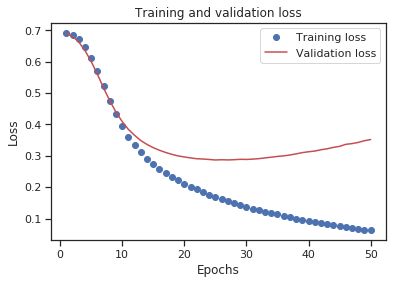

In [132]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
fig, ax = plt.subplots()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'r-', label='Validation loss') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
save_fig("imdb-loss.pdf")
plt.show()


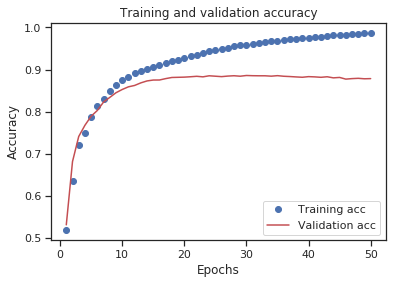

In [133]:
fig, ax = plt.subplots()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
save_fig("imdb-acc.pdf")
plt.show()

In [134]:
# Now turn on early stopping
# https://chrisalbon.com/deep_learning/keras/neural_network_early_stopping/

class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')
    
callbacks = [PrintDot(),
             keras.callbacks.EarlyStopping(monitor='val_acc', patience=2),
             keras.callbacks.ModelCheckpoint(filepath='imdb_keras_best_model.ckpt',
                                             monitor='val_acc', save_best_only=True)]


.

W0702 12:06:03.313433 140155646461760 deprecation.py:506] From /home/murphyk/miniconda3/lib/python3.7/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1775: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


.......................

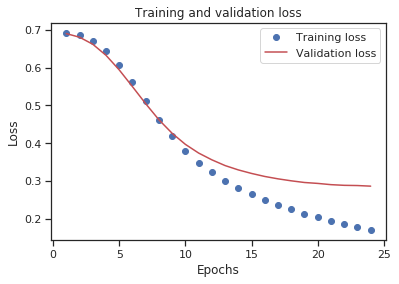

In [135]:
# Reset parameters to a new random state
model = make_model(embed_size)
history = model.fit(
    x_train, y_train, epochs=50, batch_size=512, 
    validation_data=(x_val, y_val), verbose=0, callbacks=callbacks)

history_dict = history.history
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
fig, ax = plt.subplots()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'r-', label='Validation loss') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
save_fig("imdb-loss-early-stop.pdf")
plt.show()

## PyTorch <a class="anchor" id="pytorch"></a>

In this section, we show how to fit an MLP using PyTorch 1.0

In [156]:
# import libraries
import torch
import torchvision

if torch.cuda.is_available():
    print(torch.cuda.get_device_name(0))
else:
    print('no gpu')

no gpu


## Fit an MLP to MNIST
Code is based on
https://github.com/udacity/deep-learning-v2-pytorch/blob/master/convolutional-neural-networks/mnist-mlp/mnist_mlp_solution.ipynb.
See also https://github.com/udacity/deep-learning-v2-pytorch/blob/master/intro-to-pytorch/Part%203%20-%20Training%20Neural%20Networks%20(Solution).ipynb
For CNN version, see https://github.com/pytorch/examples/blob/master/mnist/main.py.

In [137]:
# Download data

from torchvision import datasets
import torchvision.transforms as transforms

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# choose the training and test datasets
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

0it [00:00, ?it/s]

9920512it [00:01, 7718777.21it/s]                             


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 122552.17it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 2101425.24it/s]                            
0it [00:00, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 46717.94it/s]            

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


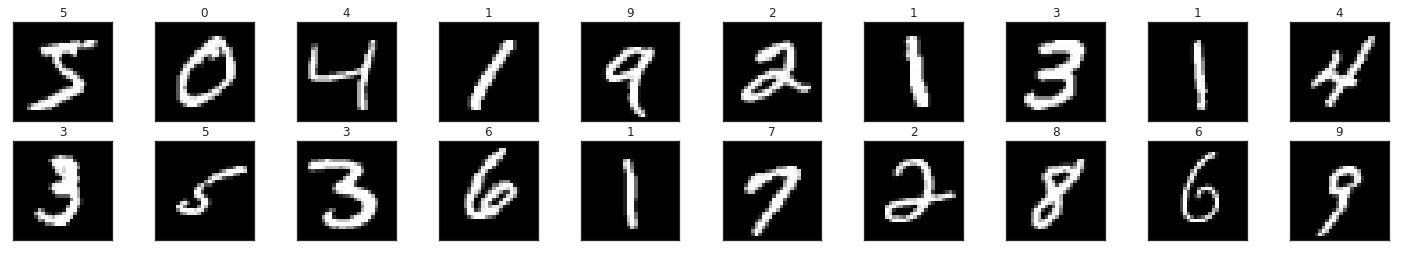

In [143]:
# Visualize data

# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))

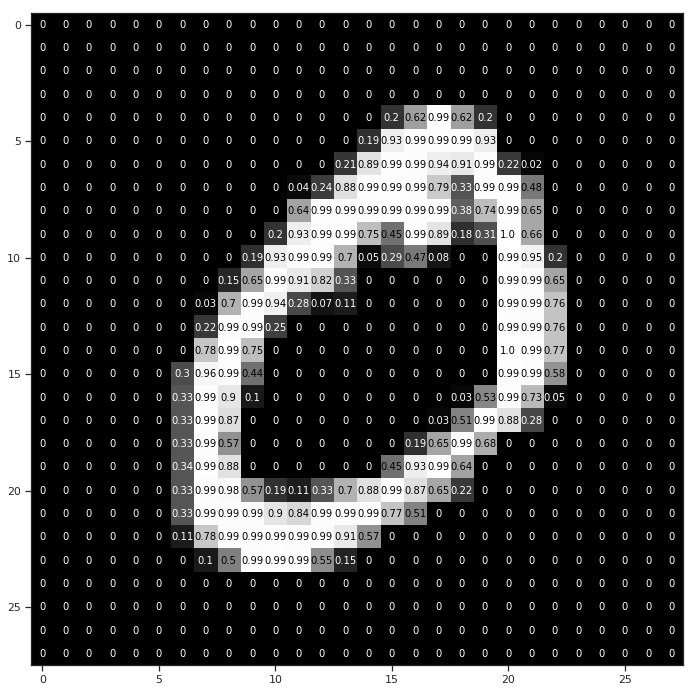

In [144]:
# View a single image as a 2d array

img = np.squeeze(images[1])

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

In [159]:
# Create a 2 layer MLP with fully connected layers.
# We optionally add dropout regularization.

import torch.nn as nn
import torch.nn.functional as F

# define the NN architecture
class Net(nn.Module):
    def __init__(self, use_dropout=False):
        super(Net, self).__init__()
        hidden_1 = 64
        hidden_2 = 64
        self.fc1 = nn.Linear(28 * 28, hidden_1)
        self.fc2 = nn.Linear(hidden_1, hidden_2)
        self.fc3 = nn.Linear(hidden_2, 10)
        self.use_dropout = use_dropout
        if use_dropout:
            self.dropout = nn.Dropout(0.2)
           
            
    def forward(self, x):
        x = x.view(-1, 28 * 28) # flatten image input to 784 dim vector
        x = F.relu(self.fc1(x))
        if self.use_dropout: x = self.dropout(x)
        x = F.relu(self.fc2(x))
        if self.use_dropout: x = self.dropout(x)
        x = self.fc3(x)
        return x

# initialize the NN
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [160]:
# PyTorch does not have a handy 'fit' function, unlike Keras.
# (Although skorch (https://skorch.readthedocs.io/en/stable/), does provide this.)
# Below we write the training loop manually.

n_epochs = 5 # Faster, and causes models to have test errors (which is more interesting to look at :)

model.train() # prep model for training

# specify loss function (categorical cross-entropy, which takes logits as input)
criterion = nn.CrossEntropyLoss()

# specify optimizer (stochastic gradient descent) and learning rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for epoch in range(n_epochs):
    train_loss = 0.0
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
             
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.sampler)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        train_loss
        ))

Epoch: 1 	Training Loss: 0.869413
Epoch: 2 	Training Loss: 0.322617
Epoch: 3 	Training Loss: 0.262126
Epoch: 4 	Training Loss: 0.220010
Epoch: 5 	Training Loss: 0.188386


In [161]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for evaluation

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(len(target)):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.sampler)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.179434

Test Accuracy of     0: 98% (969/980)
Test Accuracy of     1: 98% (1117/1135)
Test Accuracy of     2: 91% (946/1032)
Test Accuracy of     3: 93% (948/1010)
Test Accuracy of     4: 94% (925/982)
Test Accuracy of     5: 94% (845/892)
Test Accuracy of     6: 94% (904/958)
Test Accuracy of     7: 92% (951/1028)
Test Accuracy of     8: 91% (887/974)
Test Accuracy of     9: 93% (946/1009)

Test Accuracy (Overall): 94% (9438/10000)


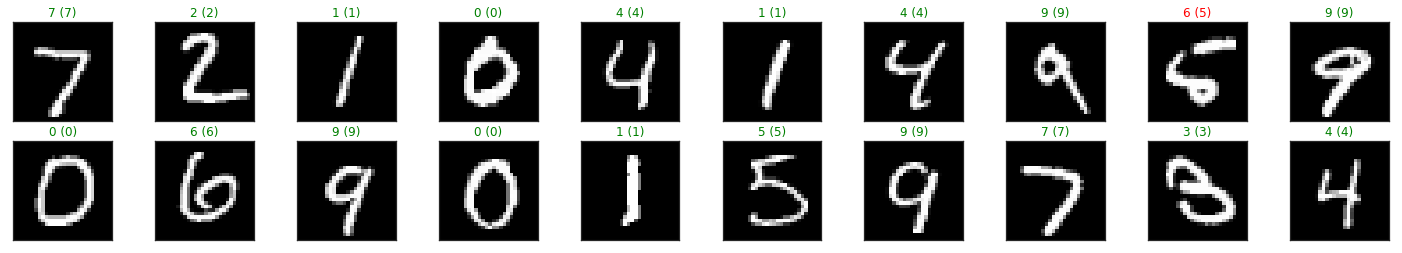

In [162]:
# Visualize test examples.
# Title has the format of predicted-label (true-label) for each image.
# Green = correct, red = incorrect.

# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))
    

## Jax <a class="anchor" id="jax"></a>

Jax is a faster version of Numpy that runs on CPU, GPU and TPU.
It is available from https://github.com/google/jax.
In addition to supporting hardware accelerators in the backend, Jax supports
several useful program transformations:

* vmap (vectorized map operator), for automatic vectorization or batching.
* jit (just in time compiler), for speeding up your code (even on a CPU).
* grad, for automatic differentiation.

We illustrate these features below.

In terms of model building,
Jax has a lightweight neural net library called [Stax](https://github.com/google/jax/blob/master/jax/experimental/stax.py), which provides an API which is similar to Keras or PyTorch.
There is also a very experimental library called [Trax](https://github.com/tensorflow/tensor2tensor/tree/master/tensor2tensor/trax) that uses Jax to provide a library for easily building more complex neural nets, such as transformers.
Once the model is built, and the loss function defined, we can pass its gradient to any optimizer. Jax has a small library of fast first-order optimization methods available [here](https://github.com/google/jax/blob/master/jax/experimental/optimizers.py).


In [186]:
import jax
import jax.numpy as np
import numpy as onp # original numpy

from jax import grad, jit, vmap, random

### Random number generation

The API for Jax is basically identical to Numpy, except for random number generation (RNG).
This is because Jax does not maintain any global state, i.e., it is purely functional.
This design "provides reproducible results invariant to compilation boundaries and backends,
while also maximizing performance by enabling vectorized generation and parallelization across random calls"
(to quote [the official page](https://github.com/google/jax#a-brief-tour)).
                              
Thus, whenever we do anything stochastic, we need to give it a fresh RNG key. We can do this by splitting the existing key into pieces. We can do this indefinitely, as shown below.


In [173]:
key = random.PRNGKey(0)
print(random.normal(key, shape=(3,)))  # [ 1.81608593 -0.48262325  0.33988902]
print(random.normal(key, shape=(3,)))  # [ 1.81608593 -0.48262325  0.33988902]  ## identical results

# To make a new key, we split the current key into two pieces.
key, subkey = random.split(key)
print(random.normal(subkey, shape=(3,)))  # [ 1.1378783  -1.22095478 -0.59153646]

# We can continue to split off new pieces from the global key.
key, subkey = random.split(key)
print(random.normal(subkey, shape=(3,)))  # [-0.06607265  0.16676566  1.17800343]

# We can always use original numpy if we like (although this may interfere with the deterministic behavior of jax)
onp.random.seed(42)
print(onp.random.randn(3))

[ 1.816 -0.483  0.34 ]
[ 1.816 -0.483  0.34 ]
[ 1.138 -1.221 -0.592]
[-0.066  0.167  1.178]
[ 0.497 -0.138  0.648]


### Vmap

In [180]:
# To illustrate vmap, consider a logistic regression model.


def sigmoid(x): return 0.5 * (np.tanh(x / 2.) + 1)

def predict_batch(w, X):
    return sigmoid(np.dot(X, w)) # (N,D) * (D,1) = (N,1) # matrix-vector multiply

def predict_single(w, X):
    return sigmoid(np.dot(w, X)) # <(D) , (D)> = (1) # inner product

D = 2
N = 3
onp.random.seed(42)
w = onp.random.randn(D)
X = onp.random.randn(N, D)
y = onp.random.randint(0, 2, N)

# We can apply predict_batch to a matrix of data, but we cannot apply predict_single in this way
# because the order of the arguments to np.dot is incorrect.

p1 = predict_batch(w, X)
try:
    p2 = predict_single(w, X)
except:
    print('cannot apply to batch')


cannot apply to batch


In [178]:
# To avoid having to think about batch shape, it is often easier to write a function that works on single
# input vectors. We can then apply this in a loop.

p3 = [predict_single(w, x) for x in X]
assert np.allclose(p1, p3)


In [187]:
# Unfortunately, mapping down a list is slow.
# Fortunately, Jax provides vmap, which has the same effect, but can be parallelized.

# We first apply the predict_single function to its first arugment, w, to get a function that only
# depends on x. We then vectorize this, and map the resulting modified function along rows (dimension 0)
# of the data matrix.

from functools import partial

predict_single_w = partial(predict_single, w)
predict_batch_w = vmap(predict_single_w)
p4 = predict_batch_w(X)
p5 = vmap(predict_single, in_axes=(None, 0))(w, X)

assert np.allclose(p1, p4)
assert np.allclose(p1, p5)


### Autograd

In this section, we illustrate automatic differentiation by using it to compute the gradient of the negative log likelihood of a logistic regression model.


In [184]:
def predict(weights, inputs):
    return sigmoid(np.dot(inputs, weights))

def loss(weights, inputs, targets):
    preds = predict(weights, inputs)
    logprobs = np.log(preds) * targets + np.log(1 - preds) * (1 - targets)
    return -np.sum(logprobs)

# Gradient function
grad_fun = grad(loss)

# Gradient of each example in the batch
grads = vmap(partial(grad_fun, w))(X,y)
assert grads.shape == (N,D)

# Gradient for entire batch
grad_sum = np.sum(grads, axis=0)
assert grad_sum.shape == (D,)

True

We can also compute higher order gradients (Hessians).
For details, see here.

### JIT (just in time compilation)

In this section, we illustrate how to use the Jax JIT compiler to make code go faster (even on a CPU).

In [188]:
grad_fun_jit = jit(grad_fun) # speedup gradient function
grads_jit = vmap(partial(grad_fun_jit, w))(X,y)
assert np.allclose(grads, grads_jit)


In [189]:
# We can apply JIT to non ML applications as well.

def slow_f(x):
  # Element-wise ops see a large benefit from fusion
  return x * x + x * 2.0

x = np.ones((5000, 5000))
fast_f = jit(slow_f)
%timeit -n10 -r3 fast_f(x)  
%timeit -n10 -r3 slow_f(x)  

13.8 ms ± 1.22 ms per loop (mean ± std. dev. of 3 runs, 10 loops each)
43.2 ms ± 3.03 ms per loop (mean ± std. dev. of 3 runs, 10 loops each)


### Optimization

JAX has a minimal optimization library focused on stochastic first-order optimizers. Every optimizer is modeled as an (`init_fun`, `update_fun`, `get_params`) triple of functions. The `init_fun` is used to initialize the optimizer state, which could include things like momentum variables, and the `update_fun` accepts a gradient and an optimizer state to produce a new optimizer state. The `get_params` function extracts the current iterate (i.e. the current parameters) from the optimizer state. The parameters being optimized can be ndarrays or arbitrarily-nested list/tuple/dict structures, so you can store your parameters however you’d like.

Below we illustrate this by fitting a logistic regression model.
We compare the results to scikit learn.

In [284]:
# Make some data

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split


if True:
    iris = sklearn.datasets.load_iris()
    X = iris["data"][:,:3] # Just take first K features to make problem harder
    y = (iris["target"] == 2).astype(onp.int)  # 1 if Iris-Virginica, else 0'
    N, D = X.shape # 150, 4

if False:
    X, y = sklearn.datasets.make_classification(n_samples=100, n_features=10,  flip_y=0.1, random_state=42)

    
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, random_state=42)

In [329]:
# Use sklearn to fit model 
from sklearn.linear_model import LogisticRegression

def predict_logit(weights, inputs):
    return np.dot(inputs, weights) # Already vectorized

def predict_prob(weights, inputs):
    return sigmoid(predict_logit(weights, inputs))

log_reg = LogisticRegression(solver="lbfgs", C=1e5, fit_intercept=False)
log_reg.fit(X_train, y_train)
w_mle_sklearn = np.ravel(log_reg.coef_)
#print(w_mle)

ptest_sklearn = predict_prob(w_mle_sklearn, X_test)
print(np.round(ptest_sklearn, 3))
ptest_sklearn2 = log_reg.predict_proba(X_test)[:,1]
print(np.round(ptest_sklearn2, 3))

[0.251 0.    1.    0.048 0.019 0.    0.    0.047 0.34  0.001 0.21  0.
 0.    0.    0.    0.01  0.998 0.009 0.297 0.998 0.    0.471 0.    0.998
 0.689 0.386 1.    0.992 0.    0.    0.    0.    0.    0.    0.    0.901
 0.001 0.    0.    0.    0.993 0.004 0.003 0.    0.    0.004 0.848 0.974
 0.    0.935]
[0.251 0.    1.    0.048 0.019 0.    0.    0.047 0.34  0.001 0.21  0.
 0.    0.    0.    0.01  0.998 0.009 0.297 0.998 0.    0.471 0.    0.998
 0.689 0.386 1.    0.992 0.    0.    0.    0.    0.    0.    0.    0.901
 0.001 0.    0.    0.    0.993 0.004 0.003 0.    0.    0.004 0.848 0.974
 0.    0.935]


In [352]:
from jax.scipy.special import logsumexp
#from scipy.misc import logsumexp

def NLL_unstable(weights, batch):
    inputs, targets = batch
    p1 = predict_prob(weights, inputs)
    logprobs = np.log(p1) * targets + np.log(1 - p1) * (1 - targets)
    N = inputs.shape[0]
    return -np.sum(logprobs)/N


def NLL(weights, batch):
    # Use log-sum-exp trick
    inputs, targets = batch
    # p1 = 1/(1+exp(-logit)), p0 = 1/(1+exp(+logit))
    logits = predict_logit(weights, inputs).reshape((-1,1))
    N = logits.shape[0]
    logits_plus = np.hstack([np.zeros((N,1)), logits]) # e^0=1
    logits_minus = np.hstack([np.zeros((N,1)), -logits])
    logp1 = -logsumexp(logits_minus, axis=1)
    logp0 = -logsumexp(logits_plus, axis=1)
    logprobs = logp1 * targets + logp0 * (1-targets)
    return -np.sum(logprobs)/N

# We can use a small amount of L2 regularization, for numerical stability
def PNLL(weights, batch, l2_penalty=1e-5):
    nll = NLL(weights, batch)
    l2_norm = np.sum(np.power(weights, 2)) # squared L2 norm
    return nll + l2_penalty*l2_norm

In [353]:
# Unit test for objective
from sklearn.metrics import log_loss
    
nll_train = log_loss(y_train, predict_prob(w_mle_sklearn, X_train))
nll_train2 = NLL(w_mle_sklearn, (X_train, y_train))
nll_train3 = NLL_unstable(w_mle_sklearn, (X_train, y_train))
print(nll_train)
print(nll_train2)
print(nll_train3)

nll_test = log_loss(y_test, y_pred_mle)
nll_test2 = NLL(w_mle_sklearn, (X_test, y_test))
nll_test3 = NLL_unstable(w_mle_sklearn, (X_test, y_test))
print(nll_test)
print(nll_test2)
print(nll_test3)
    
assert np.allclose(nll_train, nll_train2)
assert np.allclose(nll_test, nll_test2)

0.13059722032639912
0.13059726
nan
0.1648959923567236
0.164896
0.164896


In [356]:
# Use BFGS batch optimizer to compute MLE, and compare to sklearn

import scipy.optimize

def training_loss(w):
    return NLL(w, (X_train, y_train))

def training_grad(w):
    return grad(training_loss)(w)

w_mle_scipy = scipy.optimize.minimize(training_loss, w_init, jac=training_grad, method='BFGS').x
prob_scipy = predict_prob(w_mle_scipy, X_test)
prob_sklearn = predict_prob(w_mle_sklearn, X_test)
print(np.round(prob_scipy, 3))
print(np.round(prob_sklearn, 3))

assert np.allclose(prob_scipy, prob_sklearn, atol=1e-2)

[0.251 0.    1.    0.048 0.019 0.    0.    0.047 0.341 0.001 0.21  0.
 0.    0.    0.    0.01  0.998 0.009 0.297 0.998 0.    0.471 0.    0.998
 0.689 0.386 1.    0.992 0.    0.    0.    0.    0.    0.    0.    0.901
 0.001 0.    0.    0.    0.993 0.004 0.003 0.    0.    0.004 0.848 0.974
 0.    0.935]
[0.251 0.    1.    0.048 0.019 0.    0.    0.047 0.34  0.001 0.21  0.
 0.    0.    0.    0.01  0.998 0.009 0.297 0.998 0.    0.471 0.    0.998
 0.689 0.386 1.    0.992 0.    0.    0.    0.    0.    0.    0.    0.901
 0.001 0.    0.    0.    0.993 0.004 0.003 0.    0.    0.004 0.848 0.974
 0.    0.935]


Epoch 0, train NLL 0.6990973949432373
Epoch 100, train NLL 0.1816301792860031
Epoch 200, train NLL 0.1549871414899826
Epoch 300, train NLL 0.14707361161708832
Epoch 400, train NLL 0.14150400459766388
Epoch 500, train NLL 0.13671793043613434
Epoch 600, train NLL 0.13489282131195068
Epoch 700, train NLL 0.13520102202892303
Epoch 800, train NLL 0.13298006355762482
Epoch 900, train NLL 0.13390611112117767
Epoch 1000, train NLL 0.13282862305641174
Epoch 1100, train NLL 0.13436411321163177
Epoch 1200, train NLL 0.13134409487247467
Epoch 1300, train NLL 0.13310891389846802
Epoch 1400, train NLL 0.1343633234500885
Epoch 1500, train NLL 0.13254371285438538
Epoch 1600, train NLL 0.13306735455989838
Epoch 1700, train NLL 0.13086256384849548
Epoch 1800, train NLL 0.13249127566814423
Epoch 1900, train NLL 0.1307155340909958
[0.251 0.    1.    0.048 0.019 0.    0.    0.047 0.341 0.001 0.21  0.
 0.    0.    0.    0.01  0.998 0.009 0.297 0.998 0.    0.471 0.    0.998
 0.689 0.386 1.    0.992 0.    0. 

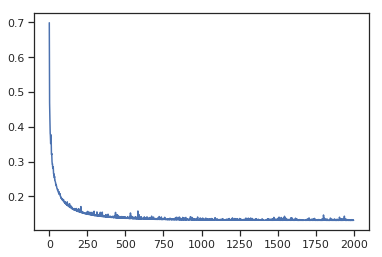

In [401]:
# Now use Jax's gradient descent optimizer

from jax.experimental import optimizers
import itertools
import time

schedule = optimizers.constant(step_size=0.1)
#schedule = optimizers.exponential_decay(step_size=0.1, decay_steps=10, decay_rate=0.9)
#schedule = optimizers.piecewise_constant([50, 100], [0.1, 0.05, 0.01])

opt_init, opt_update, get_params = optimizers.momentum(step_size=schedule, mass=0.9)
#opt_init, opt_update, get_params = optimizers.adam(step_size=schedule)

    
@jit
def update(i, opt_state, batch):
  params = get_params(opt_state)
  g = grad(NLL)(params, batch)
  return opt_update(i, g, opt_state) # update internal state using gradient and iteration number

# Use SGD to optimize parameters
onp.random.seed(43)
w_init = onp.random.randn(D)
opt_state = opt_init(w_init)
num_epochs = 2000
loss_history = []

batch_size = 10
num_train = X_train.shape[0]
num_complete_batches, leftover = divmod(num_train, batch_size)
num_batches = num_complete_batches + bool(leftover)

def data_stream():
    rng = onp.random.RandomState(0)
    while True:
        perm = rng.permutation(num_train)
        for i in range(num_batches):
            batch_idx = perm[i * batch_size:(i + 1) * batch_size]
            yield X_train[batch_idx], y_train[batch_idx]
batches = data_stream()

itercount = itertools.count()
for epoch in range(num_epochs):
    start_time = time.time()
    for _ in range(num_batches):
      opt_state = update(next(itercount), opt_state, next(batches))
    epoch_time = time.time() - start_time
    params = get_params(opt_state)
    train_loss = NLL(params, (X_train, y_train))
    loss_history.append(train_loss)
    if epoch % 500 == 0:
        #print("Epoch {} in {:0.2f} sec".format(epoch, epoch_time))
        print('Epoch {}, train NLL {}'.format(epoch, train_loss))
        
w_mle_jax = get_params(opt_state)

# Rather than comparing parameters, we compare predictions
prob_scipy = predict_prob(w_mle_scipy, X_test)
prob_jax = predict_prob(w_mle_jax, X_test)
print(np.round(prob_scipy, 3))
print(np.round(prob_jax, 3))
assert np.allclose(prob_jax, prob_sklearn, atol=1e-1)

plt.figure()
plt.plot(loss_history)